


Document Clustering
-------------------

This is ipython notebook which covers an introduction to document clustering using python. Through the analysis 
we will present a review on document clustering. 

The data set used for the analysis is a data set which contains a list of scientific documents that have been
scraped used the python package Arcas (https://github.com/Nikoleta-v3/Arcas).


The main libraries which we are going to use are going to be spacy, nltk, sklearn and pandas. 


**References**: 
   * Blog posts:
        - https://nicschrading.com/project/Intro-to-NLP-with-spaCy/
        - http://brandonrose.org/clustering#K-means-clustering
   * Articles:
        - http://scialert.net/fulltext/?doi=itj.2010.993.1002&org=11
        - http://web.mit.edu/seyda/www/Papers/PKDD06_SparseCitationGraph.pdf
        

Articles data set
-----------------
The data set contains articles relevant to Game Theory and more specifically to the Prisoner's Dilemma since 1966 to now.

A script for scapring the articles using Arcas can be found here: https://github.com/Nikoleta-v3/Axelbib/blob/scraping/scraping/scraping.py.
and also an initial analysis of the data set can be found here: https://github.com/Nikoleta-v3/Axelbib/blob/scraping/scraping/Analysis%20of%20Results/Initial%20Analysis.ipynb.

In [1]:
import pandas as pd

In [2]:
df = pd.read_json('/home/nightwing/rsc/Literature-Article/scraping/nbs/data.json')

The are a total of 1100 unique articles and by outputting a few rows we can see the format of the data set.


We are about to run various clustering algorithms to the data set. Due the nature of the work we will carry
some of the variables contained in the db are not of any use to us.
Thus the following columns will be droped:
* labels
* list_strategies
* pages
* provenance
* read
* score
* key

In [3]:
len(df.unique_key.unique())

1104

In [4]:
df.head(2)

,abstract,author,date,journal,key,key_word,labels,list_strategies,pages,provenance,read,score,title,unique_key
0,We use replicator dynamics to study an iterate...,Myungkyoon Roh,2014,"The Korean Physical Society February 2014, Vol...",Kim2014,None,None,None,None,arXiv,None,None,Network Structures between Strategies in Itera...,00660e6b2eedbebaf611cafc864ed1e4
1,We use replicator dynamics to study an iterate...,Seung-Woo Son,2014,"The Korean Physical Society February 2014, Vol...",Kim2014,None,None,None,None,arXiv,None,None,Network Structures between Strategies in Itera...,00660e6b2eedbebaf611cafc864ed1e4


In [5]:
df = df.drop(['labels', 'list_strategies', 'provenance', 'read', 'pages', 'score', 'key'], 1)

Vector space models
-------------------

The representation of a set of documents as vectors in a common vector space is known as the vector space model. In the vector space model, documents are represented as vectors of features representing the terms that occur within the collection.


A vector for a document $D_{i}$ is represented as: $ D_{i} = (w_{1,i}, w_{2,i}, ..., w_{N,i}) $

where, $D_{i}$ denotes a particular document (or feature vector), the individual scalar components $w_{j,i}$ of a document $D_{i}$ are called features and $N$ is the dimensionality of the document space. That is a document vector contains a weight feature for each of the $N_{d}$ terms that occur in the collection as whole; $w_{1,i}$ thus refers to the weight that term 1 has in document $i$.

To collect the feautures of our documents the following functions have been implemented. 
Initially we create a list with all the stopwords in the English language. Stopwords are not going
to be of any use in the analysis because they do not show anything about the context. Also some
symbols and characters are also listed.

**Note:** For the stopwords we use both sets from sklearn and nltk.

In [6]:
import tools

Functions
---------
Here are a list of functions to make things easier. For example `clean text()` will be used
to remove any symbols, spaces and HTML symbols from the text.

In order to perform our analysis the feauters have to be collected. For that we are following th following procuder. 
- take text
- break it into tokens
- get lemmas
- remove any uncesserary.

all the aforementioned are done under `tokenize_text()` function. 

Lastly, the function `all_tokens()` is used to get ahold of a 'vocabulary' of the feautures.

**Note:** we are using the lemmas because articles tend to use the same word but in different form for grammatical reasons.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy

In [8]:
len(df.groupby('unique_key'))

1104

**Here we specify the features**

In [9]:
df.head(3)

,abstract,author,date,journal,key_word,title,unique_key
0,We use replicator dynamics to study an iterate...,Myungkyoon Roh,2014,"The Korean Physical Society February 2014, Vol...",None,Network Structures between Strategies in Itera...,00660e6b2eedbebaf611cafc864ed1e4
1,We use replicator dynamics to study an iterate...,Seung-Woo Son,2014,"The Korean Physical Society February 2014, Vol...",None,Network Structures between Strategies in Itera...,00660e6b2eedbebaf611cafc864ed1e4
10,Humans and other animals can adapt their socia...,Mitsuhiro Nakamura,2010,"Journal of Theoretical Biology, 278, 55-62 (2011)",None,Numerical analysis of a reinforcement learning...,00e2e2026b199eebc643ef34a3227619


In [10]:
keywords = df.groupby('unique_key')['key_word'].apply(lambda x: ','.join(x)).reset_index()['key_word']
authors = df.groupby('unique_key')['author'].apply(lambda x: ','.join(x)).reset_index()['author']

In [11]:
df = df.drop_duplicates('unique_key')
len(df)

1104

In [12]:
df['key_word'] = list(keywords)
df['author']  = list(authors)

In [13]:
df.tail(3)

,abstract,author,date,journal,key_word,title,unique_key
9969,In spatial evolutionary games the fitness of e...,"Ishida Yoshiteru,Katsumata Yuji",2011,J. Theor. Biol. 277 (2011) 19-26,"None,None",Coveting thy neighbors fitness as a means to r...,e9d869f7667ad308488dde57eea8fff5
9974,We consider a peer-to-peer network where nodes...,"Weijun Wang,Weijun Wang,Weijun Wang,Weijun Wan...",2011,2011 Proceedings IEEE INFOCOM,"Adaptation model,Computational modeling,Thin f...",Utility optimization for dynamic peer-to-peer ...,e9fd782d6374c8976092d101594d4bef
9994,A new dynamic model for the repeated prisoner'...,"Jian Shi,Jian Shi,Shao-Meng Qin,Shao-Meng Qin,...",1986,International Journal of Game Theory,"None,None,None,None,None,None,None,None",A dynamic analysis of the repeated prisoner's ...,ea70c6309c7e45c6acdefe9d7fcc98a4


In [12]:
df['features'] = df['abstract'] + df['title'] + df['date'].apply(str) + df['key_word']

In [16]:
df.features

0        We use replicator dynamics to study an iterate...
10       Humans and other animals can adapt their socia...
100      We study the Prisoner's Dilemma in competitive...
1000     The iterated prisoner's dilemma is a famous mo...
10000    Multiple Agent Genetic Networks (MAGnet) are s...
10006    This paper studies how some factors deviate hu...
10042    Repeated interaction between individuals is th...
10044    Cooperation among nodes is essential for the r...
10072    We consider two-player non zero-sum infinite d...
10075    We study a population of individuals playing t...
10078    Zero Determinant (ZD) strategies are a new cla...
10080    Recent empirical research has shown that links...
10082    The publish-or-perish paradigm is a prevailing...
10085    Promoting cooperation is an intellectual chall...
10090    Recently, behaviors that seem to function as p...
10092    Many multiagent Q-learning algorithms have bee...
101      We study the evolution of cooperation in the s.

In [17]:
test = [k for k in df.features]

Term weighting
--------------

The term weights are set as the simple frequency counts of the terms in the documents. This method is used to assign terms weights in the document. The term frequency is simplest form the raw frequency of a term within a document. This reflects the intuition that terms occur frequently within a document may reflect its meaning more strongly than terms that occur less frequently and should thus have higher weights.

The second factor is used to give a higher weight to words that only occur in a few documents. Terms that are limited to a few documents are useful for discriminating those documents from the rest of the collection, while terms that occur frequently across the entire collection aren’t helpful. 

In [18]:
# create a tf-idf matrix
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, 
                                   min_df=0.01, 
                                   tokenizer=tools.tokenize_text, ngram_range=(2,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(test)

print(tfidf_matrix.shape)

CPU times: user 15.9 s, sys: 24 ms, total: 15.9 s
Wall time: 16 s
(1104, 295)


In [22]:
terms = tfidf_vectorizer.get_feature_names()

k-mean clustering
-----------------


In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

A few extra links on K-means: http://scikit-learn.org/stable/auto_examples/text/document_clustering.html#sphx-glr-auto-examples-text-document-clustering-py

In [79]:
# BIS measure look
# CART clustering algorithm

In [80]:
num_clusters = 1

clusterer = KMeans(n_clusters=num_clusters, max_iter=500)
cluster_labels = clusterer.fit_predict(tfidf_matrix)

Silhouette analysis can be used to study the separation distance between the resulting clusters. This measure has a range of [-1, 1].http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [42]:
silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
silhouette_avg

0.068324542882419834

In [82]:
n_clusters =[]
silhouette_scores = []
for num_clusters in range(2, 100):
    clusterer = KMeans(n_clusters=num_clusters, max_iter=500)
    cluster_labels = clusterer.fit_predict(tfidf_matrix)
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    
    n_clusters.append(num_clusters)
    silhouette_scores.append(silhouette_avg)
    #print("For n_clusters =", num_clusters,"The average silhouette_score is :", silhouette_avg)

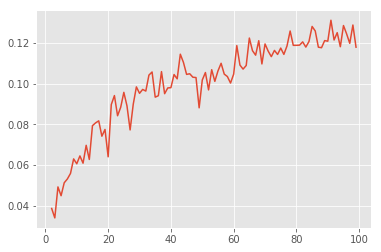

In [83]:
plt.plot(n_clusters, silhouette_scores)

In [37]:
km = KMeans(n_clusters=1, max_iter=500)
km.fit(tfidf_matrix)
    

order_centroids = km.cluster_centers_.argsort()[:, ::-1]
A = [[terms[ind] for ind in order_centroids[i, :]] for i in range(1)]
A

[['prisoner dilemma',
  'dilemma game',
  'prisoner dilemma game',
  'iterated prisoner',
  'game theory',
  'iterated prisoner dilemma',
  'tit tat',
  'evolution cooperation',
  'nash equilibrium',
  'cooperative behavior',
  'evolutionary game',
  'spatial prisoner',
  'repeat prisoner',
  'spatial prisoner dilemma',
  'quantum game',
  'cooperation prisoner',
  'emergence cooperation',
  'repeat prisoner dilemma',
  'bruhat tit',
  'scale free',
  'mutual cooperation',
  'paper present',
  'cooperation prisoner dilemma',
  'dilemma pd',
  'tat strategy',
  'long term',
  'prisoners’ dilemma',
  'social network',
  'tit tat strategy',
  'prisoner dilemma pd',
  'social dilemma',
  'evolutionary dynamic',
  'cooperator defector',
  'game player',
  'play prisoner',
  'ipd game',
  'play prisoner dilemma',
  'pd game',
  'evolutionary prisoner',
  'decision make',
  'game theoretic',
  'dilemma ipd',
  'evolutionary game theory',
  'evolutionary prisoner dilemma',
  'prisoner dilemma 

Removing keywords
-----------------

In [86]:
def tokenize_text(raw_text):
    raw_text = tools.clean_text(raw_text)
    # spacy function to get tokens
    tokens = tools.parser(raw_text)

    # lemmatize
    lemmas = []
    for tok in tokens:
        # if tok.like_num == False:
        lemmas.append(
            tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas

    # remove stopwords & symbols
    tokens = [tok for tok in tokens if tok not in tools.STOPLIST]
    tokens = [tok for tok in tokens if tok not in tools.SYMBOLS]
    tokens = [tok for tok in tokens if tok not in tools.SPECIAL_CHAR]

    tokens = [tok for tok in tokens if tok not in tools.NON_TERMS]

    # remove spaces if they exist
    while "" in tokens:
        tokens.remove("")
    while " " in tokens:
        tokens.remove(" ")
    while "\n" in tokens:
        tokens.remove("\n")
    while "\n\n" in tokens:
        tokens.remove("\n\n")

    return tokens


In [87]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, 
                                   min_df=0.01, 
                                   tokenizer=tokenize_text,
                                   ngram_range=(2,3))
%time tfidf_matrix = tfidf_vectorizer.fit_transform(df.features)

CPU times: user 13.5 s, sys: 12 ms, total: 13.5 s
Wall time: 13.5 s


In [88]:
n_clusters =[]
silhouette_scores = []
for num_clusters in range(2, 100):
    clusterer = KMeans(n_clusters=num_clusters, max_iter=500)
    cluster_labels = clusterer.fit_predict(tfidf_matrix)
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    
    n_clusters.append(num_clusters)
    silhouette_scores.append(silhouette_avg)

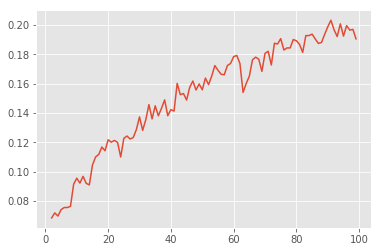

In [89]:
plt.plot(n_clusters, silhouette_scores)

In [44]:
km = KMeans(n_clusters=40, max_iter=500)
%time km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
    

order_centroids = km.cluster_centers_.argsort()[:, ::-1]
B = [[terms[ind] for ind in order_centroids[i, :5]] for i in range(40)]
B

CPU times: user 832 ms, sys: 8 ms, total: 840 ms
Wall time: 842 ms


[['evolutionarily stable',
  'probability distribution',
  'agent base',
  'monte carlo simulation',
  'high level cooperation'],
 ['game theoretical',
  'game theoretic',
  'emergence cooperation',
  'dilemma ipd game',
  'multi agent'],
 ['decision making game',
  'carlo simulation',
  'dilemma model',
  'optimal strategy',
  'cooperation spatial'],
 ['biological modeling',
  'different strategy',
  'model game',
  'high level',
  'benefit cost'],
 ['network reciprocity',
  'educational institution',
  'network result',
  'choose strategy',
  'different type'],
 ['game game',
  'cooperation evolve',
  'game nash equilibrium',
  'mean field',
  'agent play prisoner'],
 ['game nash',
  'game agent',
  'agent play',
  'evolutionarily stable',
  'base simulation'],
 ['fingerprint recognition',
  'dimensional lattice',
  'play prisoner dilemma',
  'daniel ashlock daniel',
  'phase diagram'],
 ['prisoner dilemma game',
  'prisoner dilemma ipd',
  'previous study',
  'new strategy',
  'pape

Putting together the TF-IDF matrix
----------------------------------

In [59]:
import scipy.sparse as sp

In [55]:
df = pd.read_json('/home/nightwing/rsc/Axelbib/scraping/Analysis of Results/data.json')

df = df.drop(['labels', 'list_strategies', 'provenance', 'read', 'pages', 'score', 'key'], 1)

keywords = df.groupby('unique_key')['key_word'].apply(lambda x: ','.join(x)).reset_index()['key_word']
authors = df.groupby('unique_key')['author'].apply(lambda x: ','.join(x)).reset_index()['author']

df = df.drop_duplicates('unique_key')

df['key_word'] = list(keywords)
df['author']  = list(authors)

In [56]:
df.head(3)

,abstract,author,date,journal,key_word,title,unique_key
0,We use replicator dynamics to study an iterate...,"Myungkyoon Roh,Seung-Woo Son,Young Jin Kim",2014,"The Korean Physical Society February 2014, Vol...","None,None,None",Network Structures between Strategies in Itera...,00660e6b2eedbebaf611cafc864ed1e4
10,Humans and other animals can adapt their socia...,"Eriko Fukuda,Jun Tanimoto,Keizo Shigaki,Zhen Wang",2010,"Journal of Theoretical Biology, 278, 55-62 (2011)","None,None,None,None",Numerical analysis of a reinforcement learning...,00e2e2026b199eebc643ef34a3227619
100,We study the Prisoner's Dilemma in competitive...,"Jeffrey R. Stevens,Jenny Volstorf,Jörg Rieskamp",2014,2014 Tenth International Conference on Signal-...,"None,None,None",Emergence of Cooperation in Competitive Enviro...,033c659f83d66dad535b79eced8d069e


In [57]:
len(df)

1104

In [314]:
# lets create a matrix for title and a matrix for abstract + author and keyword

In [50]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, 
                                   min_df=0.01, 
                                   tokenizer=tools.tokenize_text, ngram_range=(2,3))

In [58]:
title_matrix = tfidf_vectorizer.fit_transform(df.title)
abs_matrix = tfidf_vectorizer.fit_transform(df.abstract)
key_matrix = tfidf_vectorizer.fit_transform(df.key_word)

In [61]:
tf_matrix = sp.hstack((abs_matrix, title_matrix, key_matrix), format='csr')
tf_matrix.shape

(1104, 349)

In [62]:
n_clusters =[]
silhouette_scores = []
for num_clusters in range(2, 100):
    clusterer = KMeans(n_clusters=num_clusters, max_iter=500)
    cluster_labels = clusterer.fit_predict(tf_matrix)
    silhouette_avg = silhouette_score(tf_matrix, cluster_labels)
    
    n_clusters.append(num_clusters)
    silhouette_scores.append(silhouette_avg)

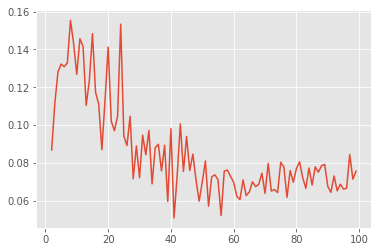

In [63]:
plt.plot(n_clusters, silhouette_scores)

In [74]:
km = KMeans(n_clusters=20, max_iter=500)
%time km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
    

order_centroids = km.cluster_centers_.argsort()[:, ::-1]
C = [[terms[ind] for ind in order_centroids[i, :5]] for i in range(5)]
C

CPU times: user 744 ms, sys: 0 ns, total: 744 ms
Wall time: 806 ms


[['ashlock daniel',
  'cooperation study',
  'ashlock daniel ashlock',
  'cooperative behavior',
  'dilemma ipd game'],
 ['prisoner dilemma game',
  'prisoner dilemma ipd',
  'previous study',
  'new strategy',
  'game theory game'],
 ['decision making game',
  'high level cooperation',
  'biological modeling',
  'game consider',
  'dilemma model'],
 ['cooperation prisoner',
  'dilemma game',
  'dilemma experiment',
  'computer simulation',
  'evolution biology),game'],
 ['emergence cooperation',
  'complex network',
  'dilemma ipd game',
  'evolutionary algorithm',
  'dilemma snowdrift']]

Repeate for removing key words
------------------------------

In [69]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, 
                                   min_df=0.01, 
                                   tokenizer=tokenize_text, ngram_range=(2,3))

In [70]:
title_matrix = tfidf_vectorizer.fit_transform(df.title)
abs_matrix = tfidf_vectorizer.fit_transform(df.abstract)
key_matrix = tfidf_vectorizer.fit_transform(df.key_word)

In [71]:
tf_matrix = sp.hstack((abs_matrix, title_matrix, key_matrix), format='csr')

In [72]:
n_clusters =[]
silhouette_scores = []
for num_clusters in range(2, 100):
    clusterer = KMeans(n_clusters=num_clusters, max_iter=500)
    cluster_labels = clusterer.fit_predict(tf_matrix)
    silhouette_avg = silhouette_score(tf_matrix, cluster_labels)
    
    n_clusters.append(num_clusters)
    silhouette_scores.append(silhouette_avg)

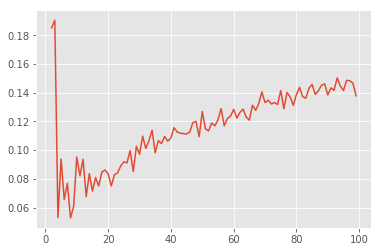

In [73]:
plt.plot(n_clusters, silhouette_scores)